In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).\
            order_by(measurement.date.desc()).first()
print(f"Most recent date is: {last_date[0]}")

Most recent date is: 2017-08-23


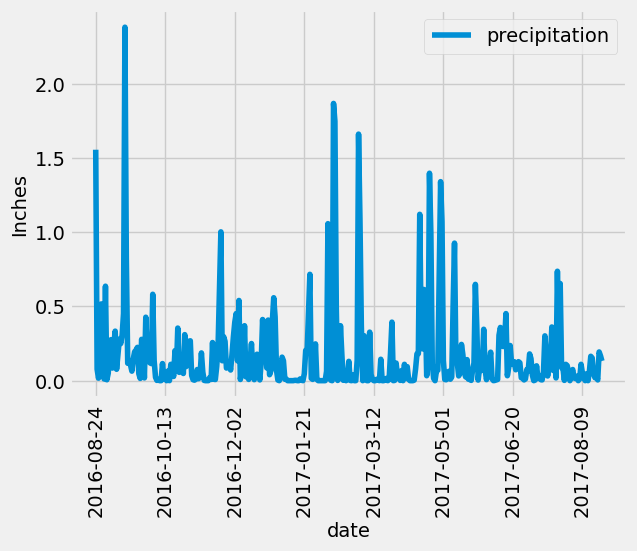

In [47]:
# Calculate the date one year from the last date in data set.

last_twelve = (dt.datetime.strptime(recent_date[0], '%Y-%m-%d') - dt.timedelta(days=365))
#print(f"year from recent: {last_twelve}")

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(measurement.date, func.avg(measurement.prcp)).\
                    filter(measurement.date >= last_twelve).\
                    group_by(measurement.date).all()
#print(precipitation_data)


# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation_data, columns= ['date','precipitation'])
precipitation_df.head()
                                                              

# Sort the dataframe by date

precipitation_df.set_index('date', inplace=True)
precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data


plot_precipitation = precipitation_df.plot(rot=90);
plot_precipitation.set_ylabel("Inches");



In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [55]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()
top_station

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

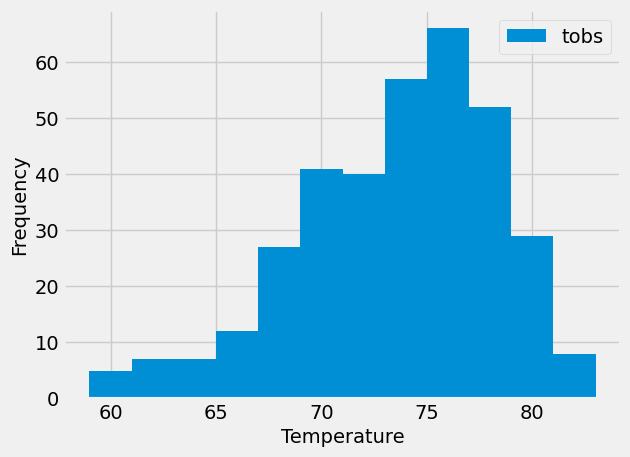

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_twelve = session.query(measurement.date,measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date > last_twelve).all()

#top_station_twelve

top_station_twelve_df = pd.DataFrame(top_station_twelve)
top_station_twelve_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")


# Close Session

In [71]:
# Close Session
session.close()